<h1><center><strong>Travail Complémentaire Intelligence Artificielle</strong></center></h1>

* Réalisé par : Mr. EN-NASYRY Issam
* Encadré par : Mme. GUIBADJ Rym

## Table de matières
0. Problème de sac à dos 
1. Algorithme A* 
    * Descirption de l'algorithme 
    * Application au problème de sac à dos
2. Algorithme génétique
    * Descirption de l'algorithme 
    * Application au problème de sac à dos
3. Algorithme Alpha-beta
    * Descirption de l'algorithme 
    * Application au problème de sac à dos
4. Evaluation des trois algorithmes 
    * Génération des données 
    * Evaluation des algorithmes 
    * Discussion sur l'algorithme génétique


# 1. Problème de sac à dos 
Le problème du sac à dos (Knapsack Problem) est un problème classique d’optimisation combinatoire appartenent à la classse NP-complet. Il tire son nom d’une situation à laquelle est souvent confronté un randonneur au moment de remplir son sac à dos : celui-ci dispose de n objets, caractérisés chacun par une utilité (profit) pi et un poids (weight) wi, compte tenu d’un poids W fixé à l’avance à ne pas dépasser, le randonneur cherche à déterminer les objets qu’il va emporter de façon à maximiser l’utilité totale des objets emportés sans dépasser la limite prescrite W pour le poids

import dependencies

In [230]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random

# 2. Algorithme A*

## 2.1 Description de l'algorithme 
<p class="last">
L'algorithme A* est un algorithme pour trouver le chemin le plus court entre deux sommets d'un graphe orienté pondéré en utilisant des estimations de coûts pour guider la recherche. 
</p>

L'algorithme prend comme données : 
* `"graph"` une graphe G = (V,A) représenté par une matrice d'agjacence (adj_matrix), avec V = num_vertices et A l'ensemble des arcs. 
* `"debut"` : indice du sommet de départ. 
* `"fin"` : indice du sommet d'arrivé.    

Les variables dont nous aurons besoin pour cet algorithme sont : 
* `"open_set"` : une liste d'attente des sommets à visiter. Elle est représentée par un tas, pour une optimisation de la mémoire. Les noeuds sont triées par rapport à leurs coûts.   
* `"explored_set"` : liste des sommets déjà exploités. 
* `"CP_values"` : un dictionnaire pour stocker les coûts et les prédécesseurs de chaque sommet. 
* `"current_node"` : indice du sommet en cours d'exploitation. 
* `"neighbors"` : liste de voisins du sommet en cours qui ne sont déjà dans le chemin
* `"current_cost"` : le coûts du sommet en cours d'exploitation. 

Les étapes de l'algorithme sont :
* initiliser les listes d'attentes et de noeuds exploités par des listes vide. 
* intiliser le dictionnaire par des couts infini et des prédécesseur vide sauf pour le sommet de départ. 
* initiliser la liste d'attente (le tas) par le sommet de départ. 
* tant que la liste d'attente n'est pas vide 
    * chercher dans le tas le noeuds ayant le moindre coût. 
    * exploiter tous les voisins du sommet en cours, calcule les coûts réel et estimé pour chaque sommet voisin.
    * calculer pour chaque voisin le coût pour l'atteindre à travers le sommet en cours, 
    * ajouter un voisin v dans la liste d'attente si le coût calculé est inférieur au coût renseigné dans le disctionnaire
    * ajouter le noeud en cours à la liste des noeuds exploités. 
</div>

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Représentation d'un graphe</strong>
Il s'agit d'une matrice carrée qui dimension égale au nombre de sommets du graphe. 

Pour chaque case d'indice i et j, la valeur associé représente le poids de l'arc allant du sommet i vers le sommet j. Si la valeur est égale à zéro, cela signifie que ces deux sommets ne sont pas adjacents. 
</blockquote>

In [231]:
class Graph:
    def __init__(self, num_vertices):
        """ cette methode est la constructeur par defaut qui permet de créer la matrice d'adjacence et de l'intiliser par des zéros  """
        self.num_vertices = num_vertices
        self.adj_matrix = [[0] * num_vertices for _ in range(num_vertices)]

    def add_edge(self, from_vertex, to_vertex, weight=1):
        """ cette méthode permet d'ajouter un arc entre deux sommets avec le poids donné """
        self.adj_matrix[from_vertex][to_vertex] = weight

    def display(self):
        """ cette méthode pour afficher la matrice d'adjacence """
        for row in self.adj_matrix:
            print(row)
    def draw_graph(self):
        """ cette methode pour afficher graphiquement le graphe """
        G = nx.DiGraph()
        for from_vertex in range(self.num_vertices):
            for to_vertex in range(self.num_vertices):
                weight = self.adj_matrix[from_vertex][to_vertex]
                if weight != 0:
                    G.add_edge(from_vertex, to_vertex, weight=weight)

        pos = nx.circular_layout(G)
        # Formatage des étiquettes des arêtes avec deux chiffres après la virgule
        edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()

In [232]:
def heuristic(node, goal):
    """ cette méthode calcul les coûts estimés d'un noeud """
    return abs(node - goal)

In [233]:
class Astar:
    """ class de l'algorithme Astar"""
    def __init__(self, graph, debut, fin):
        self.graph = graph
        self.debut = debut
        self.fin = fin

    def launch(self):
        # initialisation des listes de noeuds en attentes et noeuds exploités 
        open_set = []  
        explored_set = []

        # initialisation du dictionnaire CP_values
        CP_values = {node: (float('inf'), None) for node in range(self.graph.num_vertices)} 
        CP_values[self.debut] = (0, None)

        # Initialiser le tas par le sommet de départ 
        heapq.heappush(open_set, (heuristic(self.debut, self.fin), self.debut))

        while open_set:
            current_cost, current_node = heapq.heappop(open_set)

            if current_node == self.fin:
                path = []
                node = current_node
                while node is not None:
                    path.insert(0, node)
                    node = CP_values[node][1]
                return path, CP_values[self.fin][0]

            for neighbor, weight in enumerate(self.graph.adj_matrix[current_node]):
                if weight != 0 and neighbor not in explored_set:
                    reel_cost = CP_values[current_node][0] + weight # calculer le coût réel du voisin 
                    # si ce voisin à déjà un coût, c'est-à-dire que nous avons visité ce sommet par un autre noeud, nous allons donc comparer ces coûts. 

                    if reel_cost < CP_values[neighbor][0]: # si le cout réel est inférieur au cout estimé, alors nous allons ajouter ce noeud dans la liste d'attente à travers le neuds en cours. 
                        CP_values[neighbor] = (reel_cost, current_node)
                        est_value = reel_cost + heuristic(neighbor, self.fin)
                        heapq.heappush(open_set, (est_value, neighbor))

            explored_set + [current_node]
        return None  # Aucun chemin trouvé

## Test de fonctionnement
Afin de tester le programme, j'ai considéré un graphe simple constitué de 4 sommets et deux chemins possibles pour arriver à la destination</p>

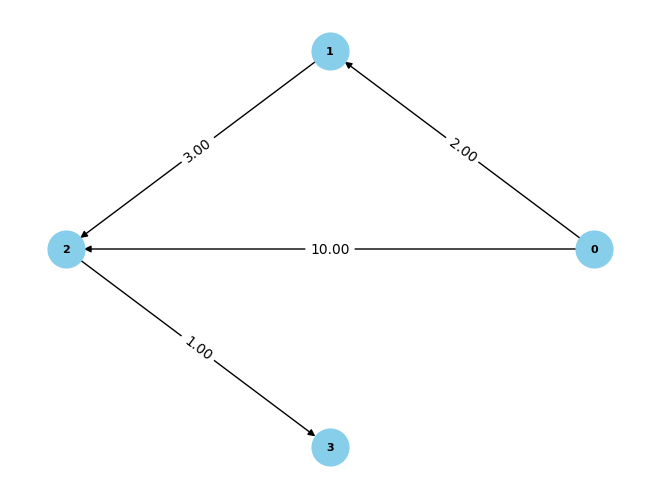

In [234]:
# Exemple d'utilisation avec le graphe précédent
graph = Graph(4)
graph.add_edge(0, 1, 2)
graph.add_edge(1, 2, 3)
graph.add_edge(2, 3, 1)
graph.add_edge(0, 2, 10)

graph.draw_graph()

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Question :</p>
<p class="last">
Quel est le chemin optimal pour aller du sommet '0' au sommet '3' ?
</p>
</div>

In [235]:
start_node = 0
goal_node = 3

A = Astar(graph, start_node, goal_node)

if A.launch():
    path, cost = A.launch()
    print("Shortest path:", path)
    print("Total cost:", cost)
else:
    print("No path found.")

Shortest path: [0, 1, 2, 3]
Total cost: 6


<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Réponse :</p>
<p class="last">
Après execution du programme, nous avons obtenu le chemin 0 -<> 1 -<> 2 -<> 3 

L'algorithme a effectivement trouvé le chemin le plus court pour arriver au sommet '3'
</p>
</div>

## 2.2 Application au problème de sac à dos 

Le problème du sac à dos peut se représenter par un graphe orienté et sans circuit, où nous associons un sommet à chaque état du sac (son poids), nous rajoutons deux
sommets artificiels : le sommet source s (de départ) et le sommet puits t (pour la fin).

Un arc qui relie un sommet A vers un sommet B signifie qu’on a ajouté un objet, ce qui fait que le poids du sac passe de l’état A à l’état B. Ainsi la valeur de l’arc peut être vue
comme 1/ la valeur de l’objet ajouté (car A* cherche le chemin le plus court donc on a besoin de prendre les chemin les plus rentable => plus la valeur de l'objet est grande, le poids de l'arc sera petit). 

In [236]:
class knapsack_graph:
    def __init__(self, values, weights, capacity):
        self.values = values
        self.max_value = max(values) + 10 
        self.weights = weights
        self.capacity = capacity
        self.states = [(0, 0)] * 2 * len(values)  # object_index and current_sac_weight 
        self.graph = Graph(len(self.states)+2) # +2 pour ajouter les sommets source et puit (indice de source est 0 indice de puit est 2*n+1)

    def explore_state(self, object_index, current_state, current_weight):
        self.graph.add_edge(current_state, 2*object_index+2, 1)

        if(current_weight + self.weights[object_index] <= self.capacity):
            self.graph.add_edge(current_state, 2*object_index+1, 1/self.values[object_index])

        if(object_index != len(self.values) -1):
            self.explore_state(object_index+1, 2*object_index+1, current_weight + self.weights[object_index])
            self.explore_state(object_index+1, 2*object_index+2, current_weight)
        else:
            self.graph.add_edge(2*object_index+1, len(self.states)+1, 1)
            self.graph.add_edge(2*object_index+2, len(self.states)+1, 1)

Simple exemple d'excution

In [237]:
values = [6, 50, 2]
weights = [10, 20, 30]
capacity = 50

Etape 1 : Construire le graphe associé 

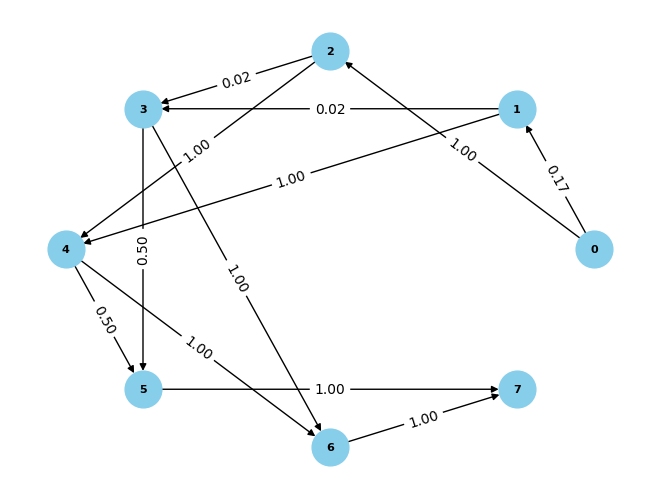

In [238]:
KP = knapsack_graph(values,weights,capacity)
KP.explore_state(0,0,0)
KP.graph.draw_graph()

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Note</strong>
La fonction heuristique qui calcule les coûts estimée pour l'algorithme A* doit également être redéfinie pour être coohérente avec le problème de sac à dos. 

Dans la nouvelle fonction de calcul des coûts estimés, la valeur retournée pour chaque sommet est égales à la somme des poids des objets restants. 


</blockquote>

Etape 2 : Définir la fonction heuristique qui calcule les coûts estimé pour chaque noeud

In [268]:
def heuristic(node, goal):
    """ cette méthode calcul les coûts estimés d'un noeud """
    return sum(list(values.values())[node:])

Etape 3 : lancer la recherche du plus court chemin entre le noeud '0' et le dernier noeud du graphe 'len(states)+1' = '7'

In [240]:
start_node = 0
goal_node = 7

A = Astar(KP.graph, start_node, goal_node)

if A.launch():
    path, cost = A.launch()
    print("Shortest path:", path)
    print("Total cost:", cost)
else:
    print("No path found.")

print(values)
print(weights)

Shortest path: [0, 2, 3, 5, 7]
Total cost: 2.52
[6, 50, 2]
[10, 20, 30]


Le chemin trouvé est [0, 1, 3, 5, 7] ce qui signifie que l'objet 1 et 2 sont selectionnés, et 3 n'est pas selectionné. la valeur du sac est donc 56.

# 3. Algorithme génétique

## 3.1 Description de l'algorithme
<p class="last">
L'algorithme génétique est une métaheuristique introduite pas Holland in 1975. C'est une classe d'algorithmes d'optimisation inspirés par la théorie de l'évolution de Darwin et les mécanismes génétiques observés dans la nature. Le principe des algorithmes génétiques consiste à effectuer des opérations sur un ensemble d'individus appelés chromosomes. Chaque chromosome est une liste de gènes avec une valeur binaire. Un chromosome représente une solution possible au problème traité. La recherche de la solution se fait en quatre étapes : 

1- `Codage` : Dans le cas général, il n’y a pas de représentation absolue. Le codage se fait selon les caractéristiques du problème. Ainsi l’encodage d’un problème peut aller de la simple chaîne  binaire, à un arbre en passant par les listes chainées. 

2- `Évaluation et sélection` : Les individus de la population sont évalués en fonction d'une certaine fonction d'aptitude appelée <em>fitness</em>, généralement la fonction objective du problème. Les chromosomes ayant une meilleure aptitude ont plus de chances d'être sélectionnés pour se reproduire. 

3- `Reproduction (croisement et mutation)` : Les meilleurs membres de la population sont sélectivement croisés par paires et mutés pour produire une descendance. 
    
* Le croisement consiste à échanger des parties des chromosomes parents pour créer des chromosomes enfants. De nombreux types d'algorithmes ont été développés, tels que le croisement en un point, le croisement en k points, la préservation du contexte, etc. 

* La mutation introduit des changements aléatoires dans les chromosomes afin d'explorer de nouvelles solutions potentielles et éviter les optimums locaux. 

4- Remplacement : Les nouveaux chromosomes résultant de ces opérations forment la population de la génération suivante et le processus est répété jusqu'à ce que le système cesse de s'améliorer. On peut suggérer de remplacer tous les parents sélectionnés ou de remplacer les individus les plus pauvres de la population actuelle ou même de remplacer les individus les plus âgés de la population actuelle (mais cela nécessite la préservation de l'information sur la durée de vie de chaque individu). Il convient de noter que cette étape est cruciale car le remplacement d'un individu implique la perte d'informations ou, en d'autres termes, peut entraîner la perte d'une solution potentiellement précieuse. Par conséquent, la sélection des individus doit être effectuée avec soin.
</p> 

Les paramètres de l'algorithme génétique sont : 
* `"population_size"` : La taille de la population.
* `"generation_size"` : le nombre d'itérations. 
* `"crossover_rate"` : le taux de croisement des individus.  
* `"mutation_rate"` : le taux de mutation des individus. 

Les variables de l'algorithmes sont: 
* `"population"` : une liste d'individus dont chacun représente une solution réalisable du problème à traiter.  
* `"fitness_scores"` : liste des fitness des individus de la population. 
* `"selected_parents"` : les individus selectionnés pendant l'itération en cours.
* `"new_population"` : la nouvelle liste d'individus générée pendant l'itération en cours. 

Les étapes de l'algorithme sont :
* créer la population initiale : la population doit être non homogène et servira de base pour les générations futures 
* tant que le nombre des itérations n'est pas atteint faire   
    *  évaluer les individus par rapport à la fonction objectif.  
    * selectionner les 50% des meilleurs individus. 
    * faire le croisement entre deux individus aléatoire de la population selectionnée.  
    * faire la mutation des nouveaux individus produits par le croisement (enfants) 
    * remplacer les individus de la population par les enfants produits durant cette itération. 
</div>

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Représentation d'un individu</strong>
Il s'agit d'une liste de gènes booléens (True ou False).  
</blockquote>

## 3.2 Application au problème de sac à dos 

1- Codage : Dans notre algorithme, nous utilisons un codage binaire. Nous représentons une solution par une chaîne de bits, dont chaque élément représente un objet avec la notation 
suivante :
*  1 si l’objet est mis dans le sac 
*  0 sinon

![Predictor fit diagram](codage_AG.png)

2- Selection et évaluation : Dans notre algorithme, la selection consiste à choisir les 50% meilleurs individus de la population. L'évaluation des individus se fait en calculant la valeur du sac. 

3- Croisement : à un point en reprenant des parties de chaque individu parent pour créer un nouvel individu enfant. 

![Predictor fit diagram](croisement_AG.png)

Dans certains cas, il se peut que le croisement fournis des enfants qui représentent des  solutions non réalisables pour notre problème, autrement dit, le poids total des objets mis dans le sac dépassent la capacité du sac. Pour remédier à cela, nous proposons un croisement à un point avec correction. C'est-à-dire, après le croisement nous effectuons une opération de correction des individus créés, qui consiste à supprimer des objets aléatoirement du sac tant que le poids total dépasse la capacité du sac. 

4- Mutation : changer aléatoirement un gène d'un individu. 

In [241]:
import random
class AG:
    """ class de l'algorithme génétique """
    def __init__(self, values, weights, capacity, population_size, generations_size, crossover_rate, mutation_rate):
        self.values = values
        self.weights = weights
        self.capacity = capacity
        self.population_size = population_size
        self.generations_size = generations_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.population = []
        
    #@lru_cache(maxsize=None)   # cette commande pour optimiser le temps de calcul 
    def weight_(self, sac):
        """
        Cette fonction renvoie la somme des poids des objets dans le sac
        """
        return sum(weights[i] for i, val in enumerate(sac) if val) 
    
    #@lru_cache(maxsize=None)
    def value_(self, sac):
        """
        Cette fonction renvoie la somme des valeurs des objets dans le sac
        """
        return sum(values[i] for i, val in enumerate(sac) if val)

    def create_individual(self):
        """
        Cette fonction génère une solution aléatoires (selectionne aléatoirement des objets puis verfie que la solution est réalisable).
        
        Renvoie une solution
        """
        sac = tuple(random.choice([False, True]) for _ in range(len(values))) 
                                                                       
        while (self.weight_(sac) > capacity):                              
            objets_presents = tuple(i for i, val in enumerate(sac) if val)                      
            objet_supprime = random.choice(objets_presents)                 
            sac = sac[:objet_supprime] + (False,) + sac[objet_supprime+1:] 
        return sac 

    def crossover(self, parent1, parent2):
        """
        Cette fonction effectue un croisement en un point entre deux parents 

        Renvoie deux nouvelles solutions enfants 
        """
        if random.random() < self.crossover_rate:
            length = len(parent1)
            crossover_point = random.randint(1, length - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            child1 = self.correct_solution(child1)
            child2 = self.correct_solution(child2)
            return child1, child2
        else:
            return parent1, parent2

    def mutate(self, individual):
        """
        Cette méthode effectue une mutation d'un individu en permuttant la valeur d'un gène 
        """
        if random.random() < self.mutation_rate:
            individual_list = list(individual)
            mutation_point = random.randint(0, len(individual_list) - 1)
            individual_list[mutation_point] = 1 - individual_list[mutation_point]
            individual = tuple(individual_list)
            individual = self.correct_solution(individual)
        return individual
     
    def correct_solution(self, individual):
        """
         Cette fonction applique des corrections pour s'assurer que la solution est réalisable
        """
        while self.weight_(individual) > self.capacity:
            individual_list = list(individual)
            # Si la capacité est dépassée, désactivez un élément aléatoire jusqu'à ce qu'elle devient réalisable
            index_to_disable = random.randint(0, len(individual) - 1)
            individual_list[index_to_disable] = 0
            # reconvertir en tuple 
            individual = tuple(individual_list)
        return individual

    def launch(self):
        """
         Cette fonction est le processus général à travers plusieurs générations. 
        """

        # Générer une population initiale
        self.population = [self.create_individual() for _ in range(self.population_size)]
        
        for it, generation in enumerate(range(self.generations_size)):
            # Évaluer la fitness de chaque individu dans la population
            fitness_scores = [self.value_(individual) for individual in self.population]
            
            # Sélectionner les meilleurs individus pour le croisement
            selected_parents = [self.population[i] for i in sorted(range(len(fitness_scores)), key=lambda k: fitness_scores[k], reverse=True)[:self.population_size // 2]]
            
            # Créer la prochaine génération par croisement et mutation
            new_population = []
            while len(new_population) < self.population_size:
                parent1, parent2 = random.sample(selected_parents, 2)
                child1, child2 = self.crossover(parent1, parent2)
                shild1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])

            self.population = new_population
            
        return max(self.population, key=lambda x: self.value_(x))

Exemple d'execution du la même instance précédente

Etape 1 : intialiser les paramètres de l'algorithme génétique

In [242]:
population_size = 50
generations_size = 100
crossover_rate = 0.8
mutation_rate = 0.2

Etape 2 : lancer la recherche de la solution par l'algorithme génétique

In [243]:
AG_knapsack = AG(values, weights, capacity, population_size, generations_size, crossover_rate, mutation_rate)
best_solution = AG_knapsack.launch()

print("Meilleure solution :", best_solution)
print("Valeur totale de la meilleure solution :", AG_knapsack.value_(best_solution))

Meilleure solution : (True, True, 0)
Valeur totale de la meilleure solution : 56


# 4. Alpgorithme alpha-beta

## 4.1 Description de l'algorithme
<p class="last">
L'algorithme Alpha-Beta est une technique d'optimisation. Son objectif est de réduire le nombre de nœuds a exploiter dans l'arbre, ce qui permet d'accélérer la recherche sans éliminer la solution optimale.
</p> 

Les variables de l'algorithmes sont: 
* `"alpha"` : représente la meilleure solution obtenu jusqu'à présent.  
* `"beta"` : représente la pire solution obtenu jusqu'à présent. 

Les étapes de l'algorithme sont :
* Pour chaque noeuds de l'arbre :
    * exploiter les successeurs du noeud en cours
    * si les enfants sont des feuilles (dernier niveau de l'arbre) alors on retourne sa valeur
    * sinon nous exploitons chaque noeud fils
    * mettre à jour les valeurs de alpha et beta en fonction du joueur en cours tel que :
        * joueur1 actualise la valeur de alpha, sachant que le joueur1 cherche toujours à maximiser la valeur de alpha 
        * joueur2 actualise la valeur de beta , sachant que le joueur2 cherche toujours à minimiser la valeur de beta
</div>

<blockquote class="comment">
<strong style="text-decoration:underline;display:block">Exploitation de l'arbre</strong>
Pour exploiter les noeuds de l'arbre nous allons utiliser une fonction récursive qui parcour tout le graphe, cette approche est similaire à l'approache de la programmation dynamique mais en éliminant les noeuds inutiles.  

La programmation dynamique est une approche générale qui se retrouve comme technique de résolution en recherche opérationnelle. Cette technique peut être appliquée quand les
sous problèmes ont des sous sous problème en commun, ce qui est le cas pour le problème de sac à dos.
</blockquote>

## 4.2 Application au problème de sac à dos

On utilise une fonction dynamique <em>pruning</em> qui prend comme données l'indice de l'objet en cours, le poids actuel, la valeur du sac actuel et le type de joueur. La fonction retourne le gain maximum généré par le choix des <em>k</em> premiers objets dont la somme des poids ne dépasse pas la capacité maximale du sac. 

Chaque joueur peut mettre à jour la valeur alpha/beta en fonction de la valeur retournée par la fonction récursive, ceci nous permet d'éliminer quelques branches de l'arbre pour accélérer la recherche de la solution optimale.  

In [270]:
class AlphaBeta:
    def __init__(self, values, weights):
        self.values = values
        self.weights = weights
        self.alpha = float('-inf')
        self.beta = float('inf')
    
    def heuristique(self, current_value, index_object):
        return current_value + sum(list(self.values.values())[:index_object])
    
    def pruning(self, index_object, capacity, value, is_maximizing_player):
        if index_object == 0 :
            return 0
        else:
            if(self.heuristique(value, index_object) < self.alpha):
                return
            if(capacity - self.weights[index_object-1] >= 0):
                value = max(self.pruning(index_object-1, capacity - self.weights[index_object-1], value + self.values[index_object-1], not is_maximizing_player) + self.values[index_object-1],
                            self.pruning(index_object-1, capacity, value, not is_maximizing_player))
            else:
                value = self.pruning(index_object-1, capacity, value, not is_maximizing_player)

            
            if(is_maximizing_player):
                alpha = max(value, self.alpha)
            else:
                beta = min(value, self.beta)
            return value

In [245]:
alpha_beta_instance = AlphaBeta(values, weights)
result = alpha_beta_instance.pruning(len(values),capacity, 0, False)
print("Maximum value:", result)

Maximum value: 56


# 5. Evaluation des trois algorithmes

Dans les sections précédentes, les différents algorithmes sont testé sur une instance de 3 objets. 

Nous allons, dans cette partie, présenter les résultats expérimentaux obtenus sur plusieurs instances. 

Nous avons cherché pour les expérimentations à mettre en valeur l’influence du nombre d’objets et l’influence de la taille maximale du sac sur l’efficacité des algorithmes. Les
résultats présentés ont été obtenus sur une moyenne de 10 instances de chaque nombre d’objets <em> n = {10,20,30,40,50,60,70,80,90,100} </em>

## 5.1 Génération des données

Dans toutes les instances, les poids sont répartis uniformément dans un intervalle de [1, R], avec R = 100.

Les groupes d’instances sont illustrés graphiquement ci-dessous.

* Groupe 1 : Instance non corrélées :  les profits et les poids sont générés aléatoirement et indépendamment dans l’intervalle [1, R], dans ce cas, il n’y a pas de corrélation
entre le profit et le poids des articles. les instances non corrélées sont généralement faciles à résoudre soit par l’utilisation de la borne supérieures ou par des relations
de dominance.

* Groupe 2 : Instance corréléess :  les poids sont répartis uniformément dans [1, R] et <em> vj = 5wj + 10 </em>.

In [252]:
def random_objects(nb_objets, weight_max, val_max):
    """
    Cette fonction génère des objets de poids et de valeur aléatoires (bornés par les valeurs passées en parametre).
    
    Renvoie un tuple de 2 dictionnaires (poids,valeur)
    """
    weights_objects ={i: random.randint(1, weight_max) for i in range(nb_objets)} 
    values_objects = {i: random.randint(1, val_max) for i in range(nb_objets)}  
                                                                    
    return weights_objects, values_objects

def random_objects_correlated(nb_objets, weight_max):
    """
    Cette fonction génère des objets de poids et de valeur aléatoires mais coorélées (bornés par les valeurs passées en parametre).
    
    Renvoie un tuple de 2 dictionnaires (poids,valeur)
    """
    weights_objects ={i: random.randint(1, weight_max) for i in range(nb_objets)}
    values_objects = {i: 5*weights_objects[i] + 10 for i in range(nb_objets)}
    return weights_objects, values_objects



Text(0.5, 1.0, 'Groupe 2')

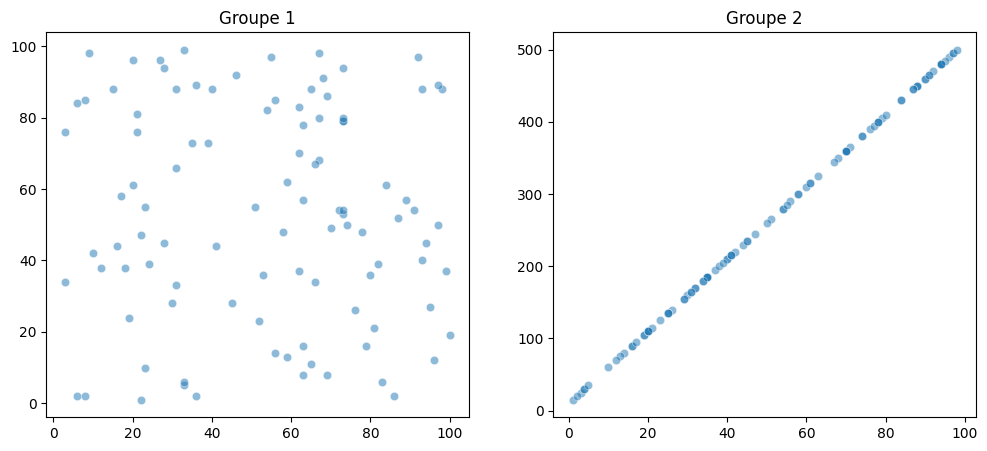

In [247]:
import seaborn as sns

columns = ["Groupe 1", "Groupe 2"]

weights1, values1 = random_objects(100,100,100)
weights2, values2 = random_objects_correlated(100,100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for Groupe 1
sns.scatterplot(x=weights1.values(), y=values1.values(), alpha=0.5, ax=axes[0])
axes[0].set_title(columns[0])

# Scatter plot for Groupe 2
sns.scatterplot(x=weights2.values(), y=values2.values(), alpha=0.5, ax=axes[1])
axes[1].set_title(columns[1])


## 5.2 Evaluation des algorithmes 
Pour chaque instance générée, nous allons lancer la résolution de cette instance avec les 3 algorithmes et nous allons évaluer le temps d'execution de ces algorithmes. 

In [259]:
weights1, values1 = random_objects(5,100,100)
capacity = sum(weights1.values()) // 2

print("Values1:", values1)
print("Weights1:", weights1)
print("Capacity:", capacity)


# résolution avec l'algorithme A* 
print("debut de Astar")

KP = knapsack_graph(values1,weights1,capacity)
KP.explore_state(0,0,0)
A = Astar(KP.graph, start_node, goal_node)



if A.launch():
    path, cost = A.launch()
    print("Shortest path:", path)
    print("Total cost:", cost)
else:
    print("No path found.")



Values1: {0: 82, 1: 41, 2: 66, 3: 2, 4: 58}
Weights1: {0: 35, 1: 74, 2: 72, 3: 16, 4: 54}
Capacity: 125
debut de Astar
Shortest path: [0, 2, 4, 5, 7]
Total cost: 2.515151515151515


In [279]:
import time
instance_size = [5, 10, 15, 20, 25]
num_instances = 10

Astar_time = [[0] * len(instance_size) for _ in range(len(instance_size))]
AG_time = [[0] * len(instance_size) for _ in range(len(instance_size))]
alpha_beta_time = [[0] * len(instance_size) for _ in range(len(instance_size))]

for _ in range(len(instance_size)):
    nb_objects = instance_size[_]
    weights, values = random_objects(nb_objects,100,100)
    capacity = sum(weights1.values()) // 2
    
    print ("Nombre d'objets ", nb_objects)

    # résolution avec l'algorithme A* 
    temps_debut = time.time()
    KP = knapsack_graph(values,weights,capacity)
    KP.explore_state(0,0,0)
    A = Astar(KP.graph, start_node, goal_node)
    path, cost = A.launch()
    temps_fin = time.time()

    Astar_time[_] = temps_fin - temps_debut

    print('temps Astar', str(Astar_time[_]))

    # résolution avec l'algorithme génétique
    temps_debut = time.time()
    population_size = 50
    generations_size = 100
    crossover_rate = 0.8
    mutation_rate = 0.2
    AG_knapsack = AG(values, weights, capacity, population_size, generations_size, crossover_rate, mutation_rate)
    best_solution = AG_knapsack.launch()
    temps_fin = time.time()

    AG_time[_] = temps_fin - temps_debut

    print('temps AG', str(AG_time[_]))

    # résolution avec alpha beta 
    temps_debut = time.time()
    alpha_beta_instance = AlphaBeta(values, weights)
    result = alpha_beta_instance.pruning(len(values),capacity, 0, False)
    temps_fin = time.time()

    alpha_beta_time[_] = temps_fin - temps_debut
    print('temps AB', str(alpha_beta_time[_]))
    

print("A*", Astar_time)
print("AG", AG_time)
print("AB", alpha_beta_time)

Nombre d'objets  5
temps Astar 0.0
temps AG 0.013000011444091797
temps AG 0.0
Nombre d'objets  10
temps Astar 0.0
temps AG 0.016002655029296875
temps AG 0.0009999275207519531
Nombre d'objets  15
temps Astar 0.01251983642578125
temps AG 0.020029783248901367
temps AG 0.024997949600219727
Nombre d'objets  20
temps Astar 0.3768641948699951
temps AG 0.018008708953857422
temps AG 0.9420661926269531
Nombre d'objets  25
temps Astar 12.41123366355896
temps AG 0.02253866195678711
temps AG 27.706119298934937
A* [0.0, 0.0, 0.01251983642578125, 0.3768641948699951, 12.41123366355896]
AG [0.013000011444091797, 0.016002655029296875, 0.020029783248901367, 0.018008708953857422, 0.02253866195678711]
AB [0.0, 0.0009999275207519531, 0.024997949600219727, 0.9420661926269531, 27.706119298934937]


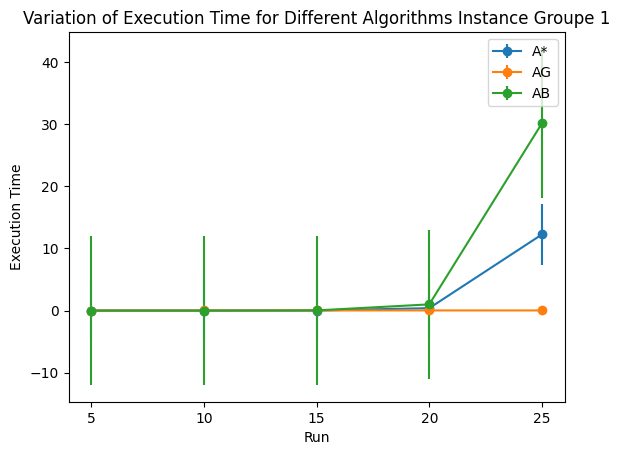

In [296]:
import numpy as np
data1 = Astar_time
data2 = AG_time
data3 = alpha_beta_time 

labels = ['5', '10', '15', '20', '25']

# Calculate means and standard deviations for each algorithm
a_star_mean, Astar_std = np.mean(Astar_time), np.std(Astar_time)
ag_mean, AG_std = np.mean(AG_time), np.std(AG_time)
ab_mean, alpha_beta_std = np.mean(alpha_beta_time), np.std(alpha_beta_time)

# Plotting
plt.errorbar(labels, Astar_time, yerr= Astar_std, label='A*', marker='o')
plt.errorbar(labels, AG_time, yerr=AG_std, label='AG', marker='o')
plt.errorbar(labels, alpha_beta_time, yerr=alpha_beta_std, label='AB', marker='o')

# Add labels and title
plt.xlabel('Run')
plt.ylabel('Execution Time')
plt.title('Variation of Execution Time for Different Algorithms Instance Groupe 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

Nous remarquons que lorsqu'on augmente le nombre d’objets, on commence à voir apparaître quelques différences entre le nombre d’instances résolues par chaque algorithme.

In [294]:
import time
instance_size = [5, 10, 15, 20, 25]
num_instances = 10

Astar_time = [[0] * len(instance_size) for _ in range(len(instance_size))]
AG_time = [[0] * len(instance_size) for _ in range(len(instance_size))]
alpha_beta_time = [[0] * len(instance_size) for _ in range(len(instance_size))]

for _ in range(len(instance_size)):
    nb_objects = instance_size[_]
    weights, values = random_objects_correlated(nb_objects,100)
    capacity = sum(weights1.values()) // 2
    
    print ("Nombre d'objets ", nb_objects)

    # résolution avec l'algorithme A* 
    temps_debut = time.time()
    KP = knapsack_graph(values,weights,capacity)
    KP.explore_state(0,0,0)
    A = Astar(KP.graph, start_node, goal_node)
    path, cost = A.launch()
    temps_fin = time.time()

    Astar_time[_] = temps_fin - temps_debut

    print('temps Astar', str(Astar_time[_]))

    # résolution avec l'algorithme génétique
    temps_debut = time.time()
    population_size = 50
    generations_size = 100
    crossover_rate = 0.8
    mutation_rate = 0.2
    AG_knapsack = AG(values, weights, capacity, population_size, generations_size, crossover_rate, mutation_rate)
    best_solution = AG_knapsack.launch()
    temps_fin = time.time()

    AG_time[_] = temps_fin - temps_debut

    print('temps AG', str(AG_time[_]))

    # résolution avec alpha beta 
    temps_debut = time.time()
    alpha_beta_instance = AlphaBeta(values, weights)
    result = alpha_beta_instance.pruning(len(values),capacity, 0, False)
    temps_fin = time.time()

    alpha_beta_time[_] = temps_fin - temps_debut
    print('temps AB', str(alpha_beta_time[_]))
    

print("A*", Astar_time)
print("AG", AG_time)
print("AB", alpha_beta_time)

Nombre d'objets  5
temps Astar 0.0
temps AG 0.011995315551757812
temps AB 0.0
Nombre d'objets  10
temps Astar 0.0010037422180175781
temps AG 0.015088081359863281
temps AB 0.0009953975677490234
Nombre d'objets  15
temps Astar 0.011869192123413086
temps AG 0.018207550048828125
temps AB 0.028496980667114258
Nombre d'objets  20
temps Astar 0.3909027576446533
temps AG 0.02469658851623535
temps AB 0.9990241527557373
Nombre d'objets  25
temps Astar 12.249751806259155
temps AG 0.02346038818359375
temps AB 30.129070281982422
A* [0.0, 0.0010037422180175781, 0.011869192123413086, 0.3909027576446533, 12.249751806259155]
AG [0.011995315551757812, 0.015088081359863281, 0.018207550048828125, 0.02469658851623535, 0.02346038818359375]
AB [0.0, 0.0009953975677490234, 0.028496980667114258, 0.9990241527557373, 30.129070281982422]


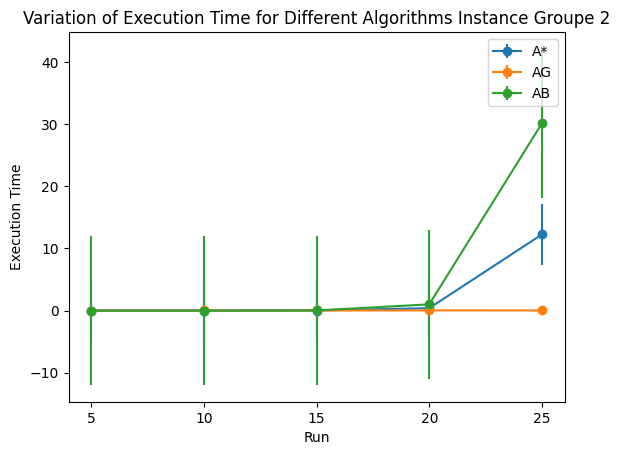

In [297]:
import numpy as np
data1 = Astar_time
data2 = AG_time
data3 = alpha_beta_time 

labels = ['5', '10', '15', '20', '25']

# Calculate means and standard deviations for each algorithm
a_star_mean, Astar_std = np.mean(Astar_time), np.std(Astar_time)
ag_mean, AG_std = np.mean(AG_time), np.std(AG_time)
ab_mean, alpha_beta_std = np.mean(alpha_beta_time), np.std(alpha_beta_time)

# Plotting
plt.errorbar(labels, Astar_time, yerr= Astar_std, label='A*', marker='o')
plt.errorbar(labels, AG_time, yerr=AG_std, label='AG', marker='o')
plt.errorbar(labels, alpha_beta_time, yerr=alpha_beta_std, label='AB', marker='o')

# Add labels and title
plt.xlabel('Run')
plt.ylabel('Execution Time')
plt.title('Variation of Execution Time for Different Algorithms Instance Groupe 2')

# Add legend
plt.legend()

# Show the plot
plt.show()

Nous remarquons que l'algorithme génétique est le plus rapide

Analysons son comportement en allant plus loin

## 5.3 Discussion sur l'algorithme génétique 

In [301]:
instance_size = [30,40,50,60,70,80,90]

AG_time = [[0] * len(instance_size) for _ in range(len(instance_size))]
alpha_beta_time = [[0] * len(instance_size) for _ in range(len(instance_size))]

for _ in range(len(instance_size)):
    nb_objects = instance_size[_]
    weights, values = random_objects_correlated(nb_objects,100)
    capacity = sum(weights1.values()) // 2
    
    print ("Nombre d'objets ", nb_objects)

    # résolution avec l'algorithme génétique
    temps_debut = time.time()
    population_size = 50
    generations_size = 100
    crossover_rate = 0.8
    mutation_rate = 0.2
    AG_knapsack = AG(values, weights, capacity, population_size, generations_size, crossover_rate, mutation_rate)
    best_solution = AG_knapsack.launch()
    temps_fin = time.time()

    AG_time[_] = temps_fin - temps_debut

    print('temps AG', str(AG_time[_]))

Nombre d'objets  30
temps AG 0.026000022888183594
Nombre d'objets  40
temps AG 0.0290682315826416
Nombre d'objets  50
temps AG 0.042037010192871094
Nombre d'objets  60
temps AG 0.03903007507324219
Nombre d'objets  70
temps AG 0.04377555847167969
Nombre d'objets  80
temps AG 0.0509793758392334
Nombre d'objets  90
temps AG 0.057894229888916016


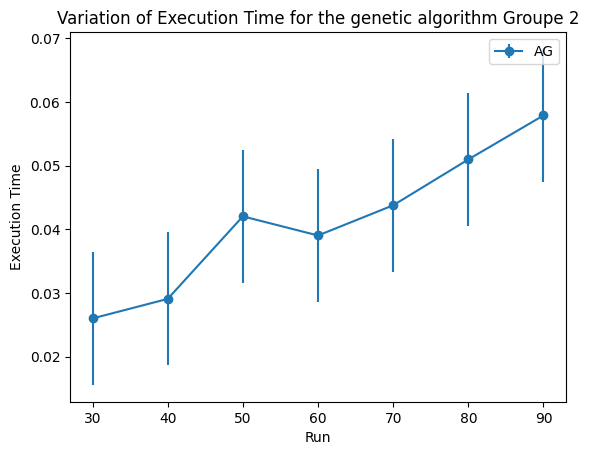

In [303]:
import numpy as np
data1 = Astar_time
data2 = AG_time
data3 = alpha_beta_time 

labels = ['30', '40', '50', '60', '70', '80', '90']

# Calculate means and standard deviations for each algorithm
ag_mean, AG_std = np.mean(AG_time), np.std(AG_time)

# Plotting
plt.errorbar(labels, AG_time, yerr=AG_std, label='AG', marker='o')

# Add labels and title
plt.xlabel('Run')
plt.ylabel('Execution Time')
plt.title('Variation of Execution Time for the genetic algorithm Groupe 2')

# Add legend
plt.legend()

# Show the plot
plt.show()

Nous remarquons que le temps d'execution du programme augmente en fonction de la taille de l'instance. Mais le temps d'execution reste acceptable vu qu'il s'agit d'un problème NP-difficile. 